### Moving average forecast is a simple and widely used method for time series forecasting. It works by taking the average of a subset of the most recent data points to make predictions for future values.



- The moving average method is a simple yet effective technique used for smoothing time series data and identifying trends or patterns. It involves calculating the average of a fixed number of consecutive data points, referred to as the window size or the period.


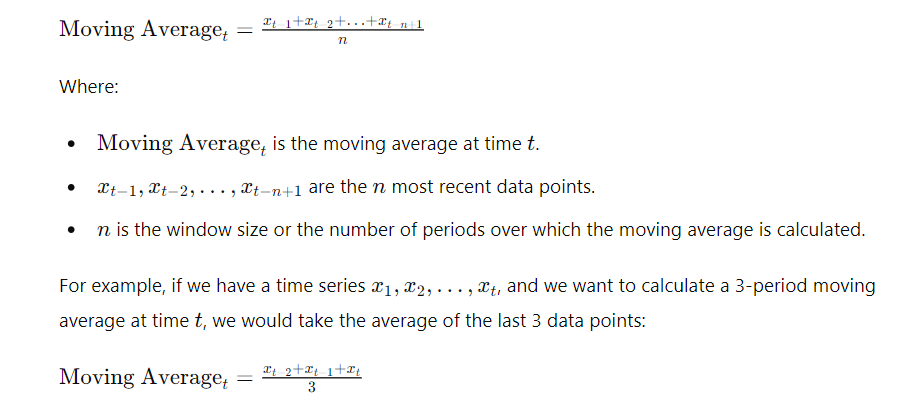

- The moving average method smooths out short-term fluctuations in the data and highlights long-term trends. It is commonly used for forecasting and trend analysis in various fields, including finance, economics, and signal processing.





 #### how the moving average forecast typically works:

- Select a Window Size: Decide on the number of previous data points (the window size) to include in the moving average calculation. This window size determines the smoothing effect of the forecast.

- Calculate the Moving Average: For each time step, calculate the average of the data points within the selected window.

- Make Predictions: Use the calculated moving average as the forecast for the next time step.

- Repeat: As new data becomes available, update the moving average by including the latest data point and removing the oldest data point from the window. Then, repeat the process of making predictions.

- Moving average forecast can be implemented using different types of moving averages, such as:

- Simple Moving Average (SMA): This is the most basic form of moving average, where each data point in the window is given equal weight.

- Weighted Moving Average (WMA): In WMA, different weights are assigned to each data point in the window. Usually, more recent data points are given higher weights.

- Exponential Moving Average (EMA): EMA gives more weight to recent observations while still considering older data. It is calculated using a smoothing factor that exponentially decreases with time.

## A simple example to show how Moving Average works

 x=[5,7,9,6,10,8,12,11] 

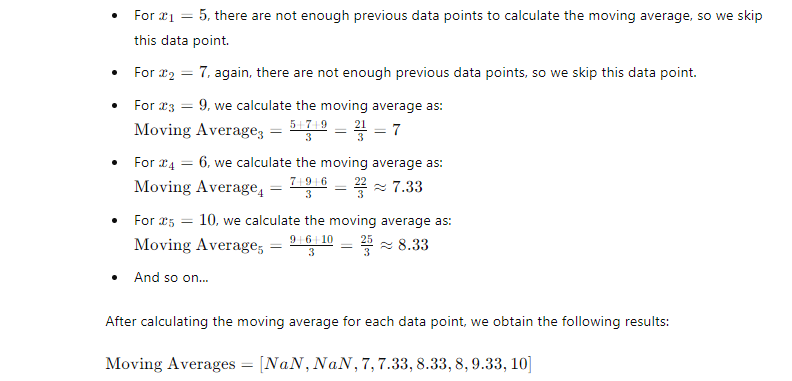


### The numpy.random.seed() function is used to set the seed for generating random numbers in NumPy. Setting the seed ensures reproducibility of the random numbers generated 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller


In [15]:
# Generate sample time series data
np.random.seed(1)
dates = pd.date_range(start='2022-01-01', periods=60, freq='M')
temperature = np.sin(np.arange(60) * np.pi / 6) + np.random.normal(scale=0.1, size=60)
dates

DatetimeIndex(['2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
               '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
               '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31',
               '2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
               '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31',
               '2024-01-31', '2024-02-29', '2024-03-31', '2024-04-30',
               '2024-05-31', '2024-06-30', '2024-07-31', '2024-08-31',
               '2024-09-30', '2024-10-31', '2024-11-30', '2024-12-31',
               '2025-01-31', '2025-02-28', '2025-03-31', '2025-04-30',
               '2025-05-31', '2025-06-30', '2025-07-31', '2025-08-31',
               '2025-09-30', '2025-10-31', '2025-11-30', '2025-12-31',
               '2026-01-31', '2026-02-28', '2026-03-31', '2026-04-30',
               '2026-05-31', '2026-06-30', '2026-07-31', '2026-08-31',
      

In [16]:
temperature

array([ 0.16243454,  0.43882436,  0.81320823,  0.89270314,  0.95256617,
        0.26984613,  0.17448118, -0.57612069, -0.83412149, -1.02493704,
       -0.71981461, -0.70601407, -0.03224172,  0.46159456,  0.97940235,
        0.89001087,  0.84878258,  0.41221416,  0.00422137, -0.44171848,
       -0.97608732, -0.88552763, -0.77586633, -0.44975057,  0.09008559,
        0.43162721,  0.85373638,  0.90642306,  0.8392366 ,  0.55303555,
       -0.06916608, -0.53967535, -0.93474267, -1.08452056, -0.93315002,
       -0.50126646, -0.11173103,  0.52344157,  1.03200562,  1.07420442,
        0.84684185,  0.4112371 , -0.07471583, -0.33075454, -0.86094463,
       -1.06369956, -0.84693386, -0.28997449,  0.0120159 ,  0.56172031,
        0.89604244,  0.96477502,  0.75177358,  0.46506573, -0.02088942,
       -0.44133768, -0.78212706, -0.90688979, -0.83746667, -0.41148588])

In [18]:
# Create pandas DataFrame
df = pd.DataFrame({'Date': dates, 'Temperature': temperature})
df.set_index('Date', inplace=True)
# If data frequency is monthly (as in the example), no changes needed
dates = pd.date_range(start='2022-01-01', periods=60, freq='M')
# If data frequency is different (e.g., daily or quarterly), specify it explicitly
dates = pd.date_range(start='2022-01-01', periods=60, freq='D')  # for daily data

In [20]:
df.head(2)

,Temperature
Date,
2022-01-31,0.162435
2022-02-28,0.438824


In [21]:
df.describe()

,Temperature
count,60.000000
mean,0.000831
std,0.702408
min,-1.084521
25%,-0.709464
50%,-0.008334
75%,0.609234
max,1.074204


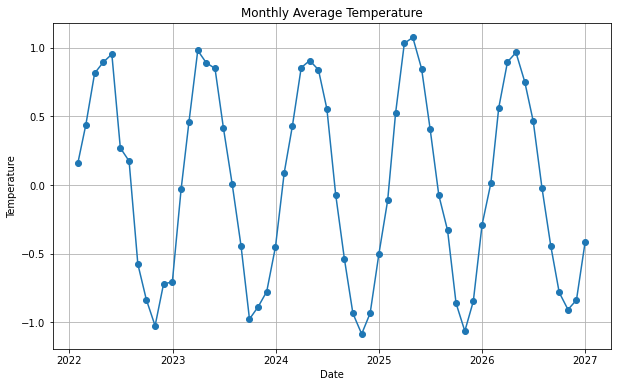

In [22]:
# Visualize the time series data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Temperature'], marker='o', linestyle='-')
plt.title('Monthly Average Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.grid(True)
plt.show()


In [23]:
# Check for stationarity
def adf_test(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic: {:.3f}'.format(result[0]))
    print('p-value: {:.3f}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {:.3f}'.format(key, value))

adf_test(df['Temperature'])

# Differencing to make the series stationary
df['Temperature_diff'] = df['Temperature'] - df['Temperature'].shift(1)

# Remove NaN values resulting from differencing
df.dropna(inplace=True)

ADF Statistic: -7.785
p-value: 0.000
Critical Values:
	1%: -3.560
	5%: -2.918
	10%: -2.597


1: POSITIVE
-1: NEGATIVE 
0: No-Correlation
    

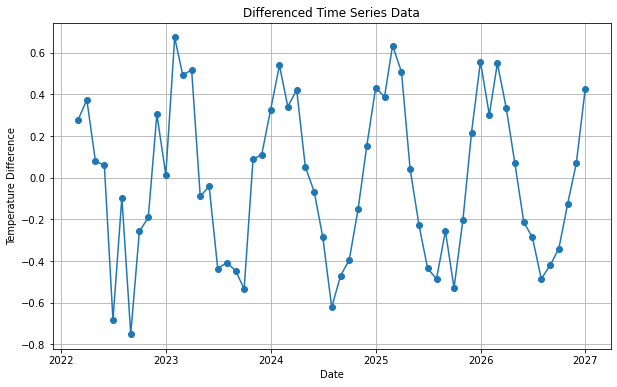

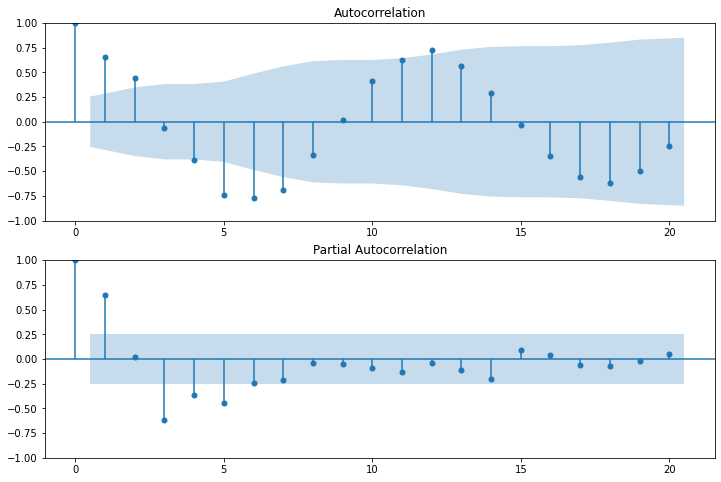

In [24]:
# Visualize differenced time series data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Temperature_diff'], marker='o', linestyle='-')
plt.title('Differenced Time Series Data')
plt.xlabel('Date')
plt.ylabel('Temperature Difference')
plt.grid(True)
plt.show()

# Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(df['Temperature_diff'], ax=ax1, lags=20)
plot_pacf(df['Temperature_diff'], ax=ax2, lags=20, method='ywm')
plt.show()

In [25]:

# Fit ARIMA model
model = ARIMA(df['Temperature'], order=(1,1,1))
results = model.fit()

C:\Users\suyashi144893\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\suyashi144893\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\suyashi144893\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


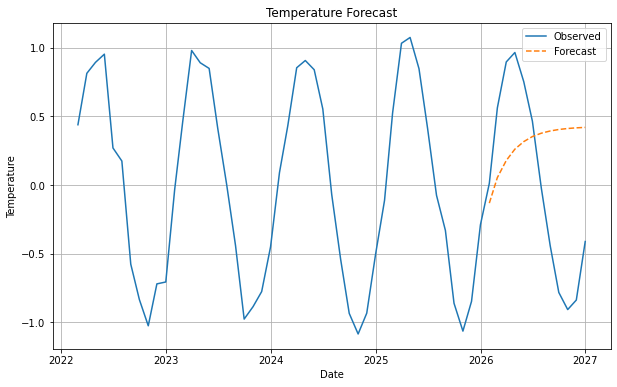

In [27]:

# Forecast
forecast_steps = 12
forecast = results.forecast(steps=forecast_steps)

# Visualize forecast
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Temperature'], label='Observed')
plt.plot(pd.date_range(start='2026-1-12', periods=forecast_steps, freq='M'), forecast, label='Forecast', linestyle='--')
plt.title('Temperature Forecast')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()


## Explanation

1. **Data Generation:**
   - We generate synthetic monthly average temperature data for 5 years using a sine function with random noise added to it.

2. **Data Preparation:**
   - We create a pandas DataFrame to store the generated data, where each row represents a month.
   - The `set_index` function is used to set the 'Date' column as the index of the DataFrame.

3. **Visualization:**
   - We visualize the generated time series data using a line plot, showing the monthly average temperatures over time.

4. **Stationarity Test:**
   - We define a function `adf_test` to perform the Augmented Dickey-Fuller test for stationarity on the time series data.
   - The `adf_test` function prints the ADF statistic, p-value, and critical values to evaluate stationarity.

5. **Differencing:**
   - We apply differencing to the time series data to make it stationary, which involves computing the difference between consecutive observations.
   - Differencing helps stabilize the mean and variance of the time series data, making it easier to model and forecast.

6. **Visualization of Differenced Data:**
   - We visualize the differenced time series data using a line plot, which shows the changes in temperature from one month to the next.

7. **Autocorrelation and Partial Autocorrelation Analysis:**
   - We plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) of the differenced data.
   - ACF and PACF plots help identify the order of autoregressive (AR) and moving average (MA) terms in an ARIMA model.

8. **Model Fitting:**
   - We fit an ARIMA model to the differenced time series data using the `ARIMA` class from `statsmodels`.
   - The `order=(1,1,1)` parameter specifies the order of the ARIMA model, which includes the number of AR, differencing, and MA terms.

9. **Forecasting:**
   - We forecast future temperature values using the fitted ARIMA model.
   - The `forecast` function predicts the next 12 months of temperatures based on the fitted model.

10. **Visualization of Forecast:**
    - We visualize the observed temperature data along with the forecasted values using a line plot.
    - This plot shows both the historical data and the predicted temperatures for the next 12 months.

Overall, the code demonstrates a basic workflow for time series analysis, including data generation, visualization, stationarity testing, differencing, model fitting, forecasting, and visualization of forecasted values.